<h4> Exploratory Data Analysis </h4>

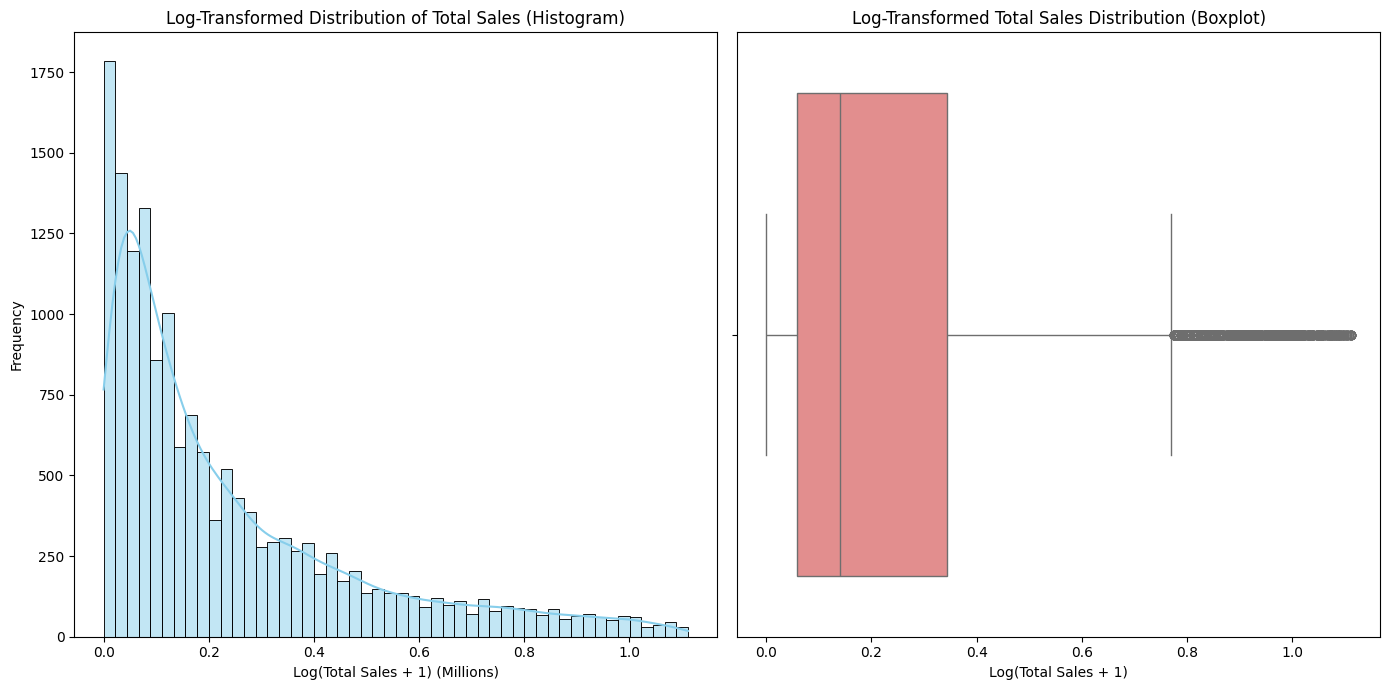

In [14]:
# Goal: Visualize the distribution of global game sales.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/cleaned_vgsales.csv')

# Apply log transformation to Total_Sales (for better visualization)
df['Log_Total_Sales'] = np.log1p(df['Total_Sales'])  # log1p is log(1 + x)

# Set a threshold to filter out extreme outliers
threshold = np.percentile(df['Log_Total_Sales'], 95)
df_filtered = df[df['Log_Total_Sales'] <= threshold]

plt.figure(figsize=(14, 7))

# Histogram.
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['Log_Total_Sales'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of Total Sales (Histogram)')
plt.xlabel('Log(Total Sales + 1) (Millions)')
plt.ylabel('Frequency')

# Boxplot.
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['Log_Total_Sales'], color='lightcoral')
plt.title('Log-Transformed Total Sales Distribution (Boxplot)')
plt.xlabel('Log(Total Sales + 1)')

plt.tight_layout()
plt.show()

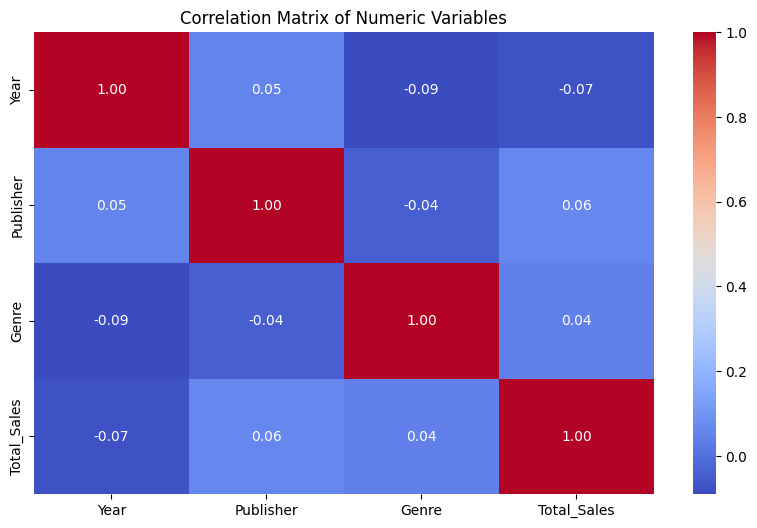

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/cleaned_vgsales.csv')

# Encode categorical variables (Publisher, Genre)
label_encoders = {}
for col in ['Publisher', 'Genre']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders for reference if needed later

# Select numeric columns for correlation
numeric_columns = ['Year', 'Publisher', 'Genre', 'Total_Sales']
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2724\1717658443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')


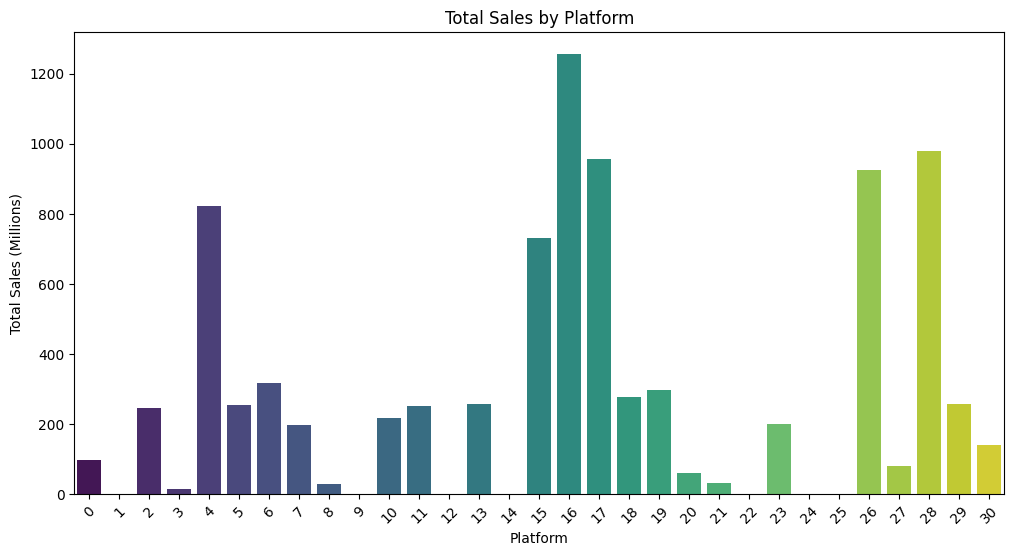

In [20]:
platform_sales = df.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2724\2352920196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='plasma')


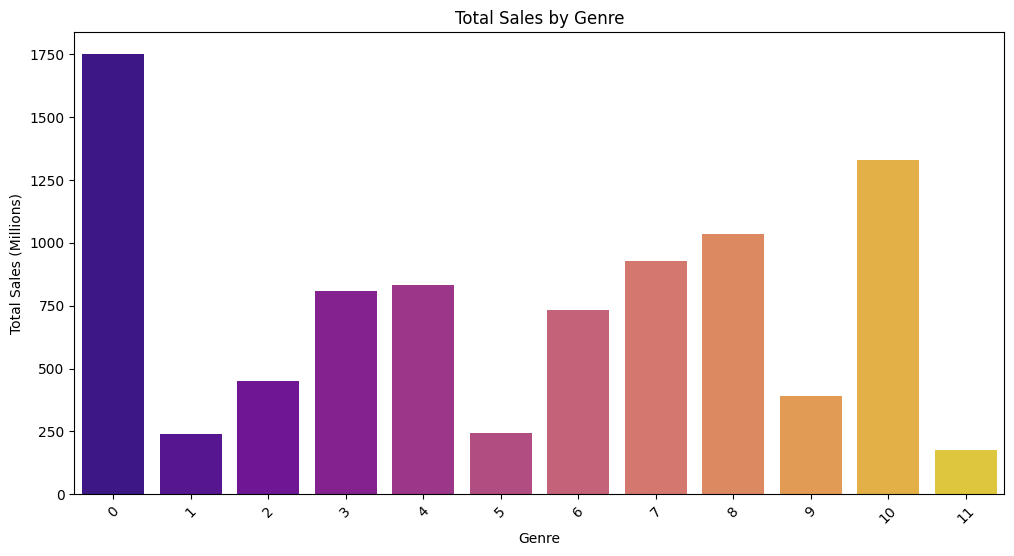

In [21]:
genre_sales = df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='plasma')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()
